Some notes on parameter fitting with least squares
-------------

When I first learned the least squares approach to solving a set of non-linear equations, more than two decades ago, I was delighted.  It was like someone had given me a huge gift, a tool with which I could approach many problems.  And while I have later learned that not all problems can be addressed by least squares fitting, it is still one of the most useful tools in my applied mathematical toolbox.

I learned the approach in the second year of my bachelors degree in Geomatics Engineering, and the notes we worked from were old then, having been written approximately about the time I was born.  Through the years, I have expected to find far better expositions of these techniques, but while the concepts have been elaborated and expanded upon, the practical aspects still somehow seem lacking. Perhaps it is a testament to the skill of the teachers I had, more than the notes.

Ultimately, this problem keeps reappearing as a parameter fitting problem.  These notes elaborate how to set up the system and come to a solution, in particular, for the less common cases (which I persistently forget how to do), such as where there are condition equations either on the observations, or constraints on the parameters.

Much of the following closely follows [1]

Let us leap directly to a nonlinear expression for the observations, $L$, in terms of the model parameters, $x$.

$
F(x)=L
$

Or, since we expect that all real observations are contaminated with error, there will be some residual, $V$

$
F(x)-L=V
$

The least squares approach is to find the $x$, that minimizes the squared error, i.e.

$
\hat{x}=argmin_x(V^TV)
$

Linearizing around our initial point, $x_0$, the solution will be approximated by

$
F(x_0)+\frac{\partial F}{\partial x}(x_0)\cdot \Delta x-L=V
$
Let $A$ be the derivative matrix, evaluated at the initial point $x_0$, so that
$
A=\frac{\partial F}{\partial x} \left (x_0 \right )
$
$
\hat{x}=x_0+\Delta x=x_0+\left (A^TA \right )^{-1}A^T\cdot\left ( L-F(x_0) \right )
$

Now the observations may have different levels of reliability associated with them, which leads to different weights being applied to them.   A weight matrix $P$ can be included as follows.
$
\hat{x}=argmin_x(V^TPV)
$

$
\hat{x}=x_0+\Delta x=x_0+\left ( A^T P A\right )^{-1}A^TP\cdot\left ( L-F(x_0) \right )
$

If the weight matrix is chosen to be the inverse of the estimated covariance matrix of the observations, then the least squares estimate is the minimum variance estimate.  If the observation errors have a Gaussian distribution then the least squares minimum variance estimate is the maximum likelihood estimate.

Since the weight matrix is in there once as an inverse and once not inverted, any scale factors cancel out.  Thus, the weight matrix is usually considered to be proportional to the inverse covariance matrix of the observations via the variance factor $\sigma_0^2$
$
P=\sigma_0^2\Sigma^{-1}
$
Under these conditions, the covariance matrix of the unknowns can be estimated as
$
\hat{sigma}_0^2=\frac{\hat{V}^TP\hat{V}}{n-u}
$
$
\hat{\Sigma}_{\hat{X}}=\hat{\sigma}_0^2\left( A^TPA\right)^{-1}
$
The values $n$ and $u$ are the number of knowns and unknowns and are the dimensions of $A$.

A few formulations
----

In the non linear case the general formulation is
$
F(X,L)=0
$
known as the combined method.  In this method, $F$ is a vector function with $r$ equations relating $n$ observations and $u$ unknowns. The quantity $(r-u)$ is called the redundancy or number of degrees of freedom. To be solvable by this approach it is required that $n+u>r>u$.

When the observations can be directly expressed as functions of the parameters, the model is
$
F(X)=L
$
and the method is called the parametric method.  In this case, there are $n$ equations, and the redundancy is $n-u$

If, on the other hand, the model consists of conditions between the observed quantities.  In this case, $F$ has $n-u$ equations.

$
F(L)=0
$
then the method is known as the condition method.




Problem 1.
Consider a resection problem - determine the position of an unknown point based on angles between some number of points distributed around you at known coordinates.



In [1]:
%%javascript 
IPython.OutputArea.prototype._should_scroll = function(lines) {    return false;   }

<IPython.core.display.Javascript object>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sympy import *
from IPython.display import display
init_printing()

def angle(A,B):
    AA=[A[0],A[1],0]/np.linalg.norm(A)
    BB=[B[0],B[1],0]/np.linalg.norm(B)
    z=np.cross(AA,BB)
    return np.arctan2(z[2],np.dot(AA,BB))
def make_random(sz,rng):
    v=np.random.random_sample(sz)
    v*=rng[1]-rng[0]
    v+=rng[0]
    return v

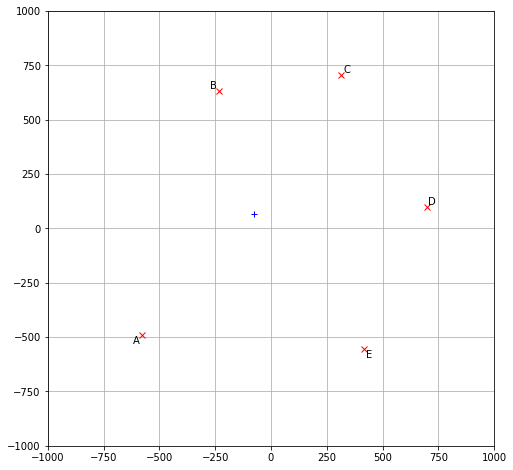

BPA: 122.6
APD: 134.3
APE: 80.3
CPB: 46.8
DPB: 103.1
DPC: 56.2
EPC: 110.3
EPD: 54.1
Found complete cycles:
BPA -> APD -> DPB
BPA -> APD -> DPC -> CPB
BPA -> APE -> EPC -> CPB
BPA -> APE -> EPD -> DPB
BPA -> APE -> EPD -> DPC -> CPB


In [124]:
# -1000 to +1000
# points between 500 and 900 away
nbPoints=5
pointsPolar=list(zip(make_random((nbPoints,),(500,900)),sorted(make_random((nbPoints,),(-np.pi,np.pi)))))
pointsCartesian=np.array([(r*np.sin(theta),r*np.cos(theta)) for r,theta in pointsPolar])
pointsNames=[chr(ord('A')+i) for i in range(nbPoints)]
myPointTrue=make_random((2,),(-200,200))

angles=[(i,j,angle(pointsCartesian[i]-myPointTrue,pointsCartesian[j]-myPointTrue)) 
        for (i,j) in itertools.combinations(range(nbPoints),2)]
angles=[(i if v>0 else j,j if v>0 else i, abs(v)) for i,j,v in angles 
        if abs(v)>np.deg2rad(10) and abs(v)<np.deg2rad(150)]

fig=plt.figure(figsize=(8,8))
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
plt.plot(myPointTrue[0],myPointTrue[1],'b+')
for i,(x,y) in enumerate(pointsCartesian):
    plt.plot(x,y,'rx')
    plt.text(x+25*np.sign(x),y+25*np.sign(y),chr(ord('A')+i),ha="center",va="center")
plt.grid()
plt.show()
for i,j,a in angles:
    print("%sP%s: %3.1f"%(pointsNames[i],pointsNames[j],np.rad2deg(a)))

# find circuits that can be used for the constraint sum of full turn is 360
# given a current point, and a list of excluded edges, find possible extensions

def findedges(current,exclude):
    edges=[]
    for i in range(len(angles)):
        if i in exclude:
            continue
        if angles[i][0]==angles[current][1]:
            edges.append(i)
    return edges

complete_cycles=[]
potential_cycles=[([i,],angles[i][2]) for i in range(len(angles))]
def cycle_to_string(c):
    if len(c[0])==0:
        return ""
    result=pointsNames[angles[c[0][0]][0]]+"P"+pointsNames[angles[c[0][0]][1]]
    for e in c[0][1:]:
        result+=" -> "
        result+=pointsNames[angles[e][0]]+"P"+pointsNames[angles[e][1]]
    return result
while len(potential_cycles)>0:
    next_potential_cycles=[]
    for pc in potential_cycles:
        #print("Potential cycle: ",cycle_to_string(pc))
        edges=findedges(pc[0][-1],pc[0])
        newcycles=[ (pc[0]+[e,],pc[1]+angles[e][2]) for e in edges]
        #print(newcycles)
        for nc in newcycles:
            if nc[1]>np.deg2rad(370):
                continue
            if angles[nc[0][-1]][1]==angles[nc[0][0]][0]:
                #print("--- found complete cycle: ",cycle_to_string(nc))
                complete_cycles.append(nc)
            else:
                #print("--- extend cycle: ",cycle_to_string(nc))
                next_potential_cycles.append(nc)
    potential_cycles=next_potential_cycles

# remove duplicates
dups=[False,]*len(complete_cycles)
for i in range(len(complete_cycles)):
    if not dups[i]:
        for j in range(i+1,len(complete_cycles)):
            if set(complete_cycles[i][0])==set(complete_cycles[j][0]):
                dups[j]=True
complete_cycles=[ c for c,d in zip(complete_cycles,dups) if not d]

print("Found complete cycles:")
for c in complete_cycles:
    print(cycle_to_string(c))

For each angle, the equation of the observation $f_i(X)=l_i$ is, defining

* $x_a,y_a$ as the coordinates of the first control point
* $y_b,y_b$ as the coordinates of the second control point
* $x_p,y_p$ as the coordinates of the center point (part of $X$)
$
l_i=\tan^{-1}((x_a-x_p)(y_b-y_p)-(x_b-x_p)(y_a-y_p),(x_a-x_p)(x_b-x_p)+(y_a-y_p)(y_b-y_p))
$
The derivative of this expression w.r.t. $x_p,y_p$ is needed to form the equations.  It can be determined symbolically.

The derivative of the conditions is simply the identity.

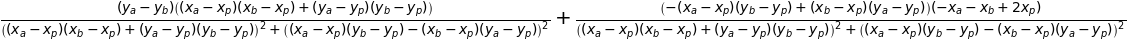

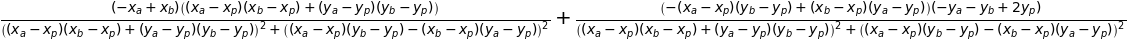

In [90]:
x_a,x_p,x_b,y_a,y_p,y_b=var(" ".join(["_".join([r,s]) for r in "xy" for s in "apb"]))
diffx=diff(atan2((x_a-x_p)*(y_b-y_p)-(x_b-x_p)*(y_a-y_p),(x_a-x_p)*(x_b-x_p)+(y_a-y_p)*(y_b-y_p)),x_p)
diffy=diff(atan2((x_a-x_p)*(y_b-y_p)-(x_b-x_p)*(y_a-y_p),(x_a-x_p)*(x_b-x_p)+(y_a-y_p)*(y_b-y_p)),y_p)

display(diffx)
display(diffy)

In [125]:
# generate an example with some noise
sigma_angle=np.deg2rad(.01)
observed_angles=[v+np.random.randn()*sigma_angle for i,j,v in angles]


In [142]:
print("There are %d parametric equations and %d conditions"%(len(angles),len(complete_cycles)))

def make_A_matrix(X_0):
    A=np.zeros((len(angles)+len(complete_cycles),2))
    for i in range(len(angles)):
        pta=pointsCartesian[angles[i][0]]
        ptb=pointsCartesian[angles[i][1]]
        A[i,0]=float(diffx.copy().subs({x_a:pta[0],x_b:ptb[0],x_p:X_0[0],y_a:pta[1],y_b:ptb[1],y_p:X_0[1]}))
        A[i,1]=float(diffy.copy().subs({x_a:pta[0],x_b:ptb[0],x_p:X_0[0],y_a:pta[1],y_b:ptb[1],y_p:X_0[1]}))
    return A

def make_B_matrix():
    B=np.zeros((len(complete_cycles)+len(angles),len(angles)))
    for i in range(len(angles)):
        B[i,i]=-1
    for i in range(len(complete_cycles)):
        for j in range(len(complete_cycles[i][0])):
            B[len(angles)+i,complete_cycles[i][0][j]]=1
    return B

def make_misclosure(X,L):
    W=np.zeros(len(angles)+len(complete_cycles))
    for i in range(len(angles)):
        W[i]=L[i]-angle(pointsCartesian[angles[i][0]]-X,pointsCartesian[angles[i][1]]-X)
    for i in range(len(complete_cycles)):
        for idx in complete_cycles[i][0]:
            W[i+len(angles)]+=L[idx]
        W[i+len(angles)]-=2.0*np.pi
    return W
        
W=make_misclosure(myPointTrue,observed_angles)
print(W)
print([observed_angles[i]-angles[i][2] for i in range(len(angles))])
            
X_0=(0,0)
print("The A matrix")
A=make_A_matrix(X_0)[:len(angles),:]
print(A)

print("True values",myPointTrue)

for i in range(5):
    dx=np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,make_misclosure(X_0,observed_angles)[:len(angles)]))
    X_0+=dx
    print(X_0)
    A=make_A_matrix(X_0)[:len(angles),:]
    
def make_hypermatrices(A,B,W):
    #print("Input shapes:",A.shape,B.shape)
    H1a=np.hstack([np.eye(len(angles)),B.T,np.zeros((len(angles),A.shape[1]))])
    H1b=np.hstack([B,np.zeros((B.shape[0],B.shape[0])),A])
    H1c=np.hstack([np.zeros((A.shape[1],B.shape[1])),A.T,np.zeros((A.shape[1],A.shape[1]))])
    #print("shapes",H1a.shape,H1b.shape,H1c.shape)
    H1=np.vstack([H1a,H1b,H1c])
    H2=np.hstack([np.zeros((len(angles),)),W,np.zeros((A.shape[1],))])
    #print("H1 shape",H1.shape)
    #print("H2 shape",H2.shape)
    return H1,H2

          
if len(complete_cycles)>0:
    X_0=(0,0)
    A=make_A_matrix(X_0)
    print("The B matrix")
    B=make_B_matrix()
    print(B)
    L=observed_angles
    for i in range(10):
        W=make_misclosure(X_0,L)
        H1,H2=make_hypermatrices(A,B,W)
        V=np.dot(np.linalg.inv(np.dot(H1.T,H1)),np.dot(H1.T,H2))
        dx=V[-2:]
        X_0+=dx
        L+=V[:len(L)]
        print("Misclosure:",W)
        print("Parameters:",X_0)
        print("Observations:",L)
    #for i in range(5):
    #    Q=np.linalg.inv(np.dot(B,B.T))
    #    ATQ=np.dot(A.T,Q)
    #    dx=np.dot(np.linalg.inv(np.dot(ATQ,A)),np.dot(ATQ,make_misclosure(X_0)))
    #    X_0+=dx
    #    print(X_0)
    #    A=make_A_matrix(X_0)
                 

There are 8 parametric equations and 5 conditions
[-1.03672584e-04  6.37212299e-05 -8.18450163e-05  1.42171148e-06
 -6.51826573e-06 -2.41467449e-04  1.89888618e-05 -1.94107458e-04
 -4.64696194e-05 -2.79997091e-04 -1.65107027e-04 -3.86143324e-04
 -6.19670796e-04]
[-0.00010367258364496479, 6.37212299303691e-05, -8.184501630470464e-05, 1.421711481319754e-06, -6.5182657258411325e-06, -0.00024146744920594543, 1.8988861826052528e-05, -0.00019410745837000754]
The A matrix
[[-0.00224943  0.00049064]
 [ 0.00105517 -0.00240884]
 [-0.00030068 -0.00187001]
 [ 0.00021271  0.00103766]
 [ 0.00119426  0.0019182 ]
 [ 0.00098154  0.00088054]
 [ 0.00233739  0.00034171]
 [ 0.00135585 -0.00053883]]
True values [-75.86720528  67.14765072]
[-78.34798601  62.77154415]
[-75.86275906  67.14925342]
[-75.87244765  67.13986347]
[-75.87244732  67.13986274]
[-75.87244732  67.13986274]
The B matrix
[[-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -

In [68]:
A=(1,0.2,0)
B=(-1,0,0)
def angle(A,B):
    AA=[A[0],A[1],0]/np.linalg.norm(A)
    BB=[B[0],B[1],0]/np.linalg.norm(B)
    z=np.cross(AA,BB)
    return np.arctan2(z[2],np.dot(AA,BB))

print(np.rad2deg(angle((1,0),(0.5,0.5))))
print(np.rad2deg(angle((1,0),(0.5,0.8))))
print(np.rad2deg(angle((1,0),(-0.5,0.8))))
print(np.rad2deg(angle((1,0),(-0.5,-0.8))))
print(np.rad2deg(angle((0.5,0.5),(1,0))))
print(np.rad2deg(angle((0.5,0.8),(1,0))))
print(np.rad2deg(angle((-0.5,0.8),(1,0))))
print(np.rad2deg(angle((-0.5,-0.8),(1,0))))

45.0
57.9946167919165
122.0053832080835
-122.0053832080835
-45.0
-57.9946167919165
-122.0053832080835
122.0053832080835


Problem statement
1 (a nice linear space)
GPS - solve for x,y,z,t given measured t's from many sources.

2. (with some constraints)

Spaceship, solve for quaternion and position, given many directions of stars.

3. (more constraints)

Articulated spaceship?

[1] Wells, D. E. and Krakiwsky, E. J. 1971. The Method of Least Squares. Lecture notes 18, Geodesy and Geomatics Engineering, University of New Brunswick.
